In [3]:
from pyuvdata import UVData
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob
import warnings
warnings.filterwarnings('ignore')
from astropy.coordinates import Angle
import astropy.units as u
from astropy.time import Time
# import dsacalib.constants as ct
import os, shutil
# import dsacalib.calib as dc
# import dsacalib.plotting as dp
import matplotlib.pyplot as plt
import pylab
import struct

In [4]:
def read_UV(files):
    UV = UVData()
    UV.read(files, file_type='uvh5')
    return(UV)

def plot_autocorrs(files=None,UV=None,f1=None,f2=None):
    if UV is None:
        if files is not None:
            UV = UVData()
            UV.read(files, file_type='uvh5')
        else:
            print('input files')
            return()
    freq = UV.freq_array
    ant1 = UV.ant_1_array
    ant2 = UV.ant_2_array
    time = UV.time_array
    nt = UV.Ntimes
    vis = UV.data_array
    vis = vis.reshape(nt, -1, 1, vis.shape[-2], 2).squeeze()
    time = time.reshape(nt, -1)[:, 0]
    ant1 = ant1.reshape(nt, -1)[0, :]
    ant2 = ant2.reshape(nt, -1)[0, :]
    tdiff = np.diff(time)
    assert np.all(tdiff==tdiff[0])
    autocorrs = np.where(ant1==ant2)[0]
    ccyc = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig, ax = plt.subplots(len(autocorrs)//len(ccyc)+1, 1,
                           figsize=(8, 4*len(autocorrs)//len(ccyc)+1),
                           sharex=True, sharey=True)
    for j in range(len(autocorrs)//len(ccyc)+1):
        for i, ac in enumerate(autocorrs[len(ccyc)*j:len(ccyc)*(j+1)]):
            ax[j].plot(freq.squeeze()/1e9, np.abs(vis[-1, ac, ..., 0]), alpha=0.5, 
                     color = ccyc[i%len(ccyc)], ls='-', label=ant1[ac]+1)
            ax[j].plot(freq.squeeze()/1e9, np.abs(vis[-1, ac, ..., 1]), alpha=0.5, 
                     color = ccyc[i%len(ccyc)], ls=':')
        ax[j].legend()
        ax[j].set_xlim(1.280, 1.530)
        if f1 is not None:
            if f2 is not None:
                ax[j].set_xlim(f1,f2)
        #ax[j].set_xlabel('freq (GHz)')
        #plt.setp(ax[j].get_xticklabels(),visible=True)
    plt.subplots_adjust(hspace=0)


In [5]:
def plot_ts(UV=None,f1=None,f2=None):
    freq = UV.freq_array
    ant1 = UV.ant_1_array
    ant2 = UV.ant_2_array
    time = UV.time_array
    nt = UV.Ntimes
    vis = UV.data_array
    vis = vis.reshape(nt, -1, 1, vis.shape[-2], 2).squeeze()
    if f1 is not None:
        if f2 is not None:
            vis = vis[:,:,f1:f2,:]
    time = time.reshape(nt, -1)[:, 0]
    ant1 = ant1.reshape(nt, -1)[0, :]
    ant2 = ant2.reshape(nt, -1)[0, :]
    tdiff = np.diff(time)
    assert np.all(tdiff==tdiff[0])
    autocorrs = np.where(ant1==ant2)[0]
    ccyc = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig, ax = plt.subplots(len(autocorrs)//len(ccyc)+1, 1,
                           figsize=(8, 4*len(autocorrs)//len(ccyc)+1),
                           sharex=True, sharey=True)
    for j in range(len(autocorrs)//len(ccyc)+1):
        for i, ac in enumerate(autocorrs[len(ccyc)*j:len(ccyc)*(j+1)]):
            
            ya = 10.*np.log10(np.abs(vis[:, ac, :, 0]).mean(axis=1))
            yb = 10.*np.log10(np.abs(vis[:, ac, :, 1]).mean(axis=1))
            ya -= ya[0]
            yb -= yb[0]
            
            ax[j].plot(ya, alpha=0.5, 
                     color = ccyc[i%len(ccyc)], ls='-', label=ant1[ac]+1)
            ax[j].plot(yb, alpha=0.5, 
                     color = ccyc[i%len(ccyc)], ls=':')
        ax[j].legend()
        #plt.ylim(-0.05,0.05)
    plt.subplots_adjust(hspace=0)
    

In [6]:
def plot_basel(UVa=None,a1=28,a2=12):
    
    plt.figure(figsize=(15,15))
    aa = [12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,99,100,101,115]
    
    for UV in UVa:
    
        freq = UV.freq_array
        ant1 = UV.ant_1_array
        ant2 = UV.ant_2_array
        time = UV.time_array
        nt = UV.Ntimes
        vis = UV.data_array
        vis = vis.reshape(nt, -1, 1, vis.shape[-2], 2).squeeze()
        time = time.reshape(nt, -1)[:, 0]
        ant1 = ant1.reshape(nt, -1)[0, :]
        ant2 = ant2.reshape(nt, -1)[0, :]
        tdiff = np.diff(time)
        assert np.all(tdiff==tdiff[0])

        for j in range(24):
            pylab.subplot(4,6,j+1)
    
            for i in np.arange(len(ant1)):        
                if ant1[i]==aa[j]:
                    if ant2[i]==aa[j]:
                #data = np.reshape(vis[:,i,:,:],(vis.shape[0],int(vis.shape[2]/8),8,2)).mean(axis=2)
                #plt.imshow(np.angle(data[:,:,0]),origin='lower',aspect='auto')
                #plt.imshow(np.angle(data[:,:,1]),origin='lower',aspect='auto')
                        data = np.mean(vis[:,i,:,:],axis=0)
                        plt.plot(freq[0],10.*np.log10(data[:,0].real),label=str(aa[j]+1)+'B',color='blue')
                        plt.plot(freq[0],10.*np.log10(data[:,1].real),label=str(aa[j]+1)+'A',color='orange')
                        plt.legend()
    #plt.xlabel('Frequency')
    #plt.ylabel('Power (relative dB)')
    #plt.ylim(35.,41.)
    #
    plt.show()

In [7]:
files = ['/mnt/data/dsa110/correlator/corr05/2021-01-27T11:41:20.hdf5']
print(files)
UV = read_UV(files)
nt = UV.Ntimes
tm = UV.time_array.reshape(nt, -1)[:, 0]
tm -= tm[0]
tm *= 86400.

['/mnt/data/dsa110/correlator/corr05/2021-01-27T11:41:20.hdf5']


OSError: /mnt/data/dsa110/correlator/corr05/2021-01-27T11:41:20.hdf5 not found

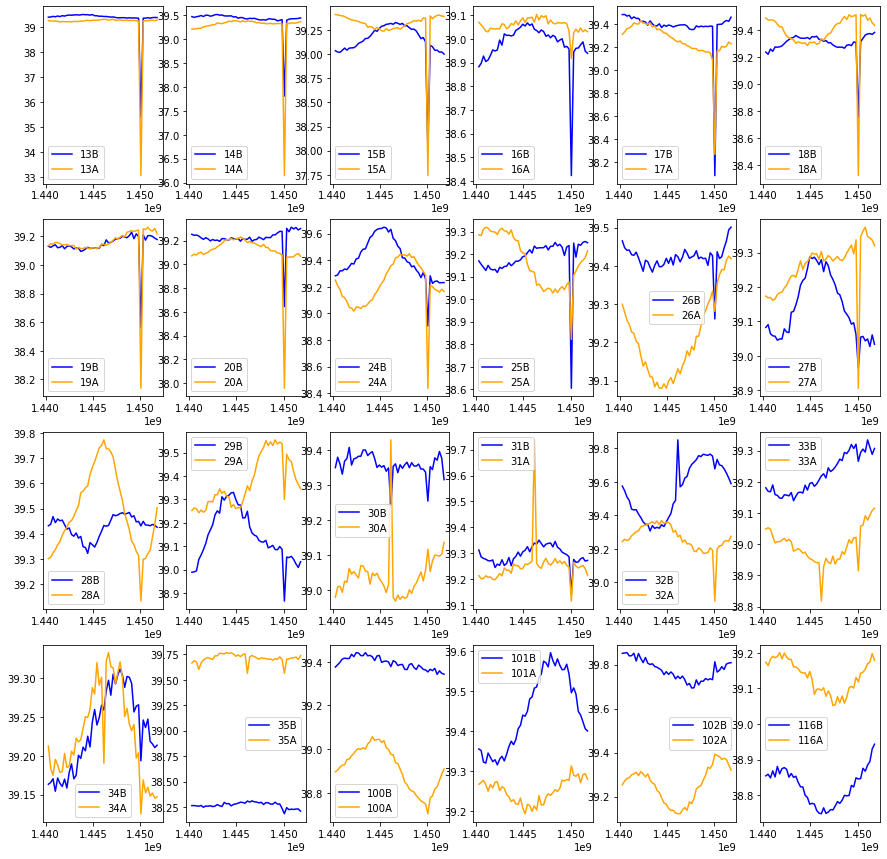

In [11]:
plot_basel(UVa=[UV])

In [60]:
plot_ts(UV=UV,f1=10,f2=20)

AssertionError: 

(1, 48)


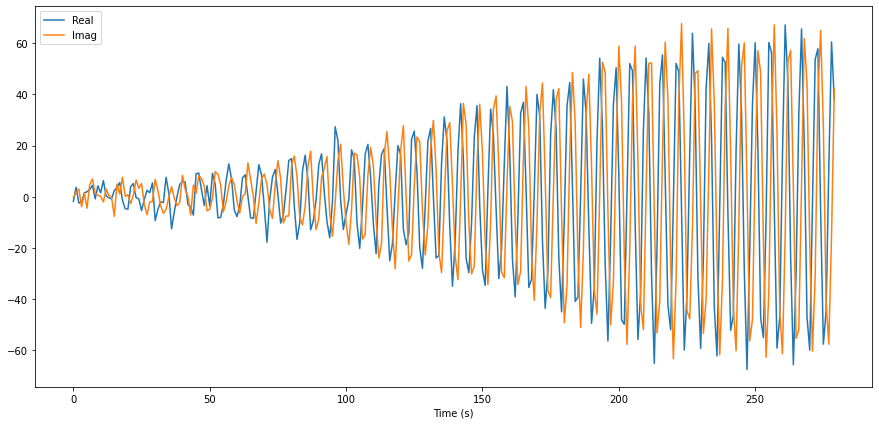

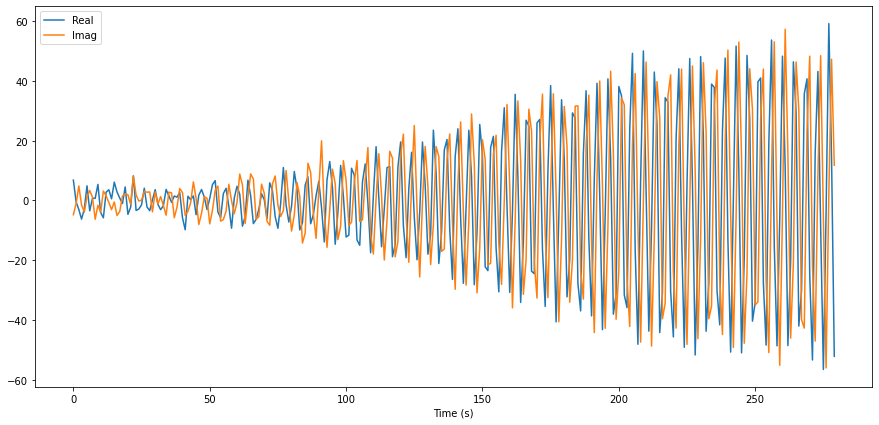

In [25]:
vis = UV.data_array
nt = UV.Ntimes
vis = vis.reshape(nt, -1, 1, vis.shape[-2], 2).squeeze()
vis.shape # time, baseline, freq, polarization
vis = vis[:,:,:,0]

freqs = UV.freq_array
print(freqs.shape)

bl1 = np.mean(vis[:,158,10:15],axis=1)
plt.figure(figsize=(15,7))
#plt.imshow(np.angle(bl1).transpose(),origin='lower',cmap='coolwarm',aspect='auto')
plt.plot(np.real(bl1),label='Real')
plt.plot(np.imag(bl1),label='Imag')
#plt.plot(tm,np.abs(bl1),label='Phase')
plt.xlabel('Time (s)')
plt.legend()

bl2 = np.mean(vis[:,164,10:15],axis=1)
#bl2 = vis[:,64,:]
plt.figure(figsize=(15,7))
#plt.imshow(np.angle(bl2).transpose(),origin='lower',cmap='coolwarm',aspect='auto')
plt.plot(np.real(bl2),label='Real')
plt.plot(np.imag(bl2),label='Imag')
#plt.plot(tm,np.abs(bl2),label='Phase')
plt.xlabel('Time (s)')
plt.legend()





In [20]:
print(UV.uvw_array.shape)
print(UV.data_array.shape)

(91000, 3)
(91000, 1, 48, 2)


Text(0, 0.5, 'v (m)')

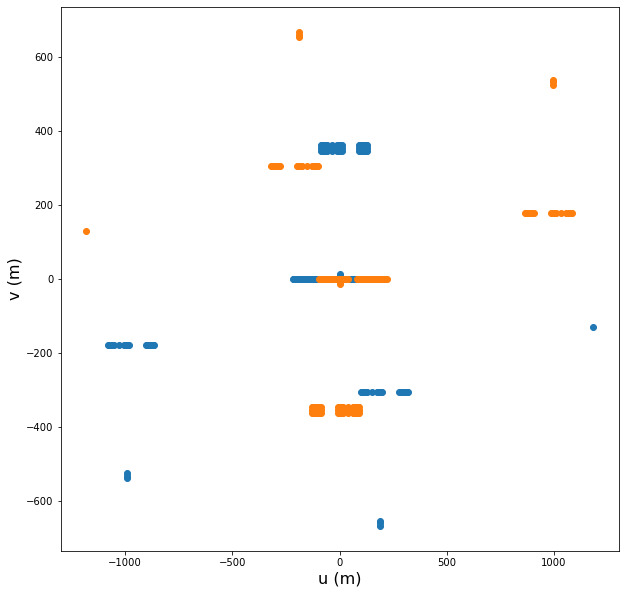

In [52]:
u = UV.uvw_array[:,0].reshape((UV.Ntimes,int(UV.uvw_array.shape[0]/UV.Ntimes)))
v = UV.uvw_array[:,1].reshape((UV.Ntimes,int(UV.uvw_array.shape[0]/UV.Ntimes)))
plt.figure(figsize=(10,10))
plt.scatter(u[0,:],v[0,:])
plt.scatter(-u[0,:],-v[0,:])
plt.xlabel('u (m)',fontsize=16)
plt.ylabel('v (m)',fontsize=16)

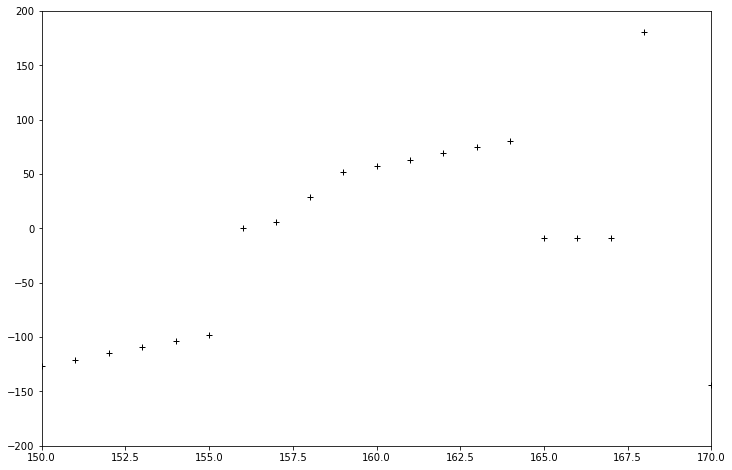

In [66]:
uvdist = np.sqrt(u*u+v*v)
plt.figure(figsize=(12,8))
plt.plot(u[0,:],'k+')
plt.xlim(150,170)
plt.ylim(-200,200)
plt.show()

In [22]:
def save_lab(UV,t1,t2,f1=10,f2=15):
    
    freq = UV.freq_array[0,f1:f2].mean()
    print('Frequency: ',freq)
    
    um = UV.uvw_array[:,0].reshape((UV.Ntimes,int(UV.uvw_array.shape[0]/UV.Ntimes)))[t1:t2,:]
    vm = UV.uvw_array[:,1].reshape((UV.Ntimes,int(UV.uvw_array.shape[0]/UV.Ntimes)))[t1:t2,:]
    
    vis = UV.data_array
    vis = vis.reshape(nt, -1, 1, vis.shape[-2], 2).squeeze()
    vis = vis[t1:t2,:,f1:f2].mean(axis=2)
    
    t_mjd = UV.time_array.reshape(nt, -1)[t1:t2, 0]
    
    np.savez('data.npz',vis=vis,frequencies_Hz=freq,times_MJD=t_mjd,u_meters=um,v_meters=vm,DEC_degrees=2.0)

In [26]:
save_lab(UV,t1=240,t2=275)

Frequency:  1448838500.9765625
